In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
from IPython.display import display

In [11]:
dataset = pd.read_csv('./Datasets/20241016 Gym Members Exercise Dataset/gym_members_exercise_tracking.csv')
dataset.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07


In [18]:
# Selecionando os atributos quantitativos escolhidos para análise
selected_columns = [
    'Weight (kg)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
    'Session_Duration (hours)', 'Calories_Burned',
    'Fat_Percentage', 'BMI'
]
data_for_clustering = dataset[selected_columns]

In [19]:
# Normalização dos dados para evitar distorções devido a diferentes escalas
data_normalized = (data_for_clustering - data_for_clustering.mean()) / data_for_clustering.std()

In [20]:
# Gerando dendogramas usando os métodos de ligação 'single' e 'complete'
linkage_methods = ['single', 'complete']

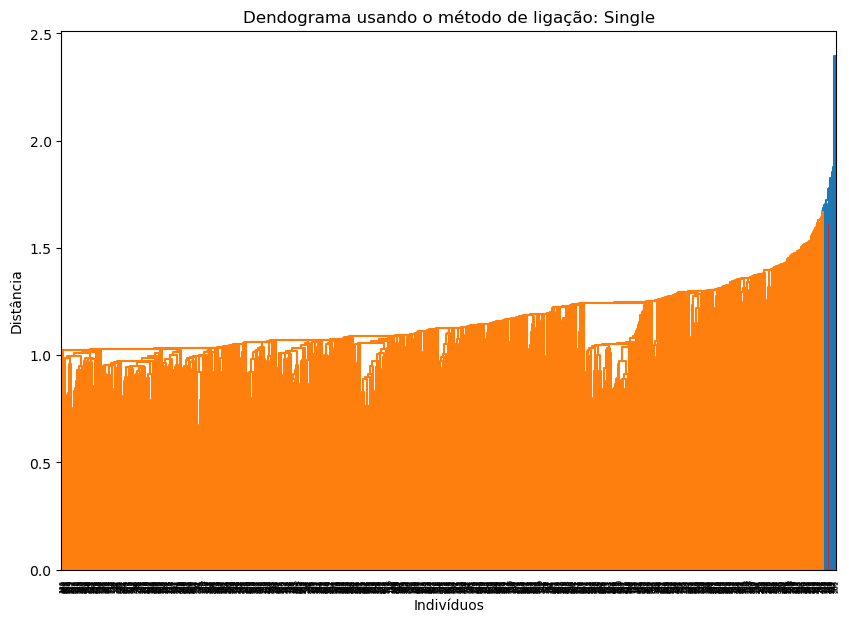

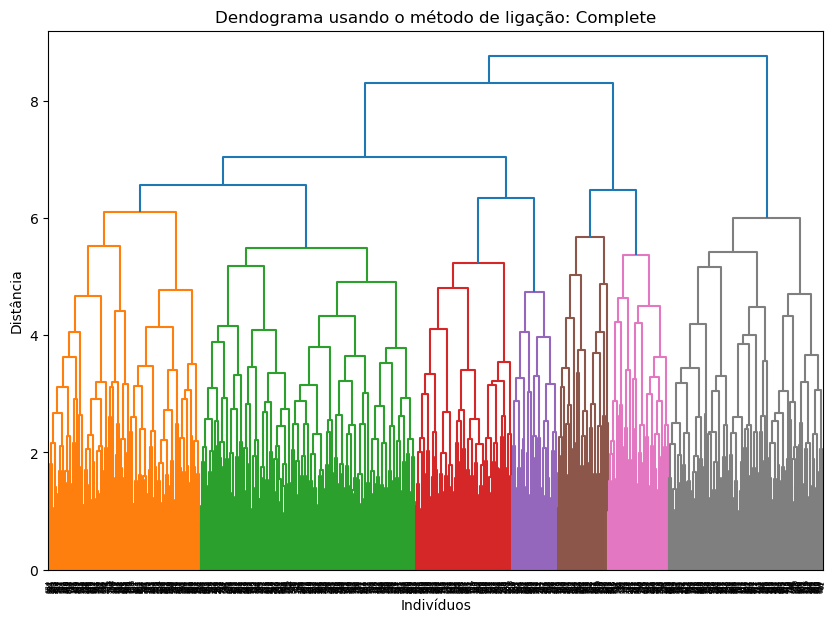

In [21]:
# Criando dendrogramas para cada método de ligação
for method in linkage_methods:
    linked = linkage(data_normalized, method=method)
    plt.figure(figsize=(10, 7))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
    plt.title(f"Dendograma usando o método de ligação: {method.capitalize()}")
    plt.xlabel("Indivíduos")
    plt.ylabel("Distância")
    plt.show()

In [22]:
# Os dendogramas foram gerados utilizando os métodos de ligação Single e Complete. 
# Prosseguimos com a formação dos clusters baseados nesses dendogramas, 
# escolhendo os melhores pontos de corte para cada método e avaliando a qualidade dos agrupamentos gerados

In [27]:
# Escolha do ponto de corte para os métodos e criação dos clusters
# O corte será feito de maneira a obter um número interpretável de grupos para análise

# Para o método 'single'
clusters_single = fcluster(linkage(data_normalized, method='single'), t=6, criterion='maxclust')


In [28]:
# Para o método 'complete'
clusters_complete = fcluster(linkage(data_normalized, method='complete'), t=6, criterion='maxclust')

In [29]:
# Adicionando os rótulos dos clusters ao dataframe para comparação
dataset['Cluster_Single'] = clusters_single
dataset['Cluster_Complete'] = clusters_complete

In [34]:
# Visualizar a distribuição de indivíduos em cada cluster para ambos os métodos
cluster_summary = dataset[['Cluster_Single', 'Cluster_Complete']].value_counts().unstack()


In [35]:
# Recalculando a média dos atributos quantitativos por cluster para garantir a definição das variáveis
cluster_means_single = dataset.groupby('Cluster_Single')[selected_columns].mean()
cluster_means_complete = dataset.groupby('Cluster_Complete')[selected_columns].mean()

In [36]:
# Exibindo as médias dos atributos em cada cluster para os dois métodos
print("Média dos atributos quantitativos por cluster - Método Single")
display(cluster_means_single)

print("\nMédia dos atributos quantitativos por cluster - Método Complete")
display(cluster_means_complete)

Média dos atributos quantitativos por cluster - Método Single


,Weight (kg),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,BMI
Cluster_Single,,,,,,,,
1,73.632128,179.896694,143.714876,62.219008,1.258171,906.272727,24.977273,24.831281
2,118.600000,163.000000,168.000000,67.000000,0.770000,640.000000,25.900000,40.090000
3,98.600000,197.000000,162.000000,74.000000,0.830000,740.000000,21.100000,34.120000
4,124.200000,168.000000,158.000000,50.000000,1.500000,1304.000000,29.300000,40.100000
5,116.500000,198.000000,148.000000,51.000000,0.530000,388.000000,27.300000,40.790000
6,126.800000,161.000000,133.000000,73.000000,0.960000,632.000000,20.800000,47.720000



Média dos atributos quantitativos por cluster - Método Complete


,Weight (kg),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,BMI
Cluster_Complete,,,,,,,,
1,73.367526,180.237113,142.927835,62.159794,1.753866,1261.000000,14.929897,24.630052
2,109.363158,175.157895,154.026316,59.578947,1.186579,966.644737,24.913158,35.323026
3,113.111111,183.666667,137.587302,66.507937,0.989524,709.396825,25.119048,35.513968
4,73.703911,187.078212,137.178771,58.458101,1.077877,737.692737,28.177095,25.414078
5,61.689259,174.370370,138.137037,65.418519,1.141667,775.388889,27.958519,21.252519
6,64.610471,181.209424,156.706806,60.937173,1.196545,925.565445,27.945550,22.261990


In [ ]:
# As análises de médias dos atributos quantitativos por cluster nos métodos Single e Complete 
# revelaram padrões distintos nos grupos. Observa-se que o método Complete tende a formar clusters mais homogêneos, 
# especialmente em relação ao condicionamento físico e composição corporal (ex.: BMI e Fat_Percentage), 
# enquanto o método Single cria agrupamentos com maior variabilidade interna.

# Análise Descritiva e Conclusões:
# Método Complete:

# Apresenta agrupamentos com diferenças mais claras entre os perfis, destacando padrões relacionados ao nível de condicionamento (e.g., clusters com baixos valores de gordura e altos de calorias queimadas).
# Melhor distinção de perfis: por exemplo, um cluster com maior média de Max_BPM e Fat_Percentage, indicando alta intensidade de treino e maior composição de gordura.
# Método Single:

# Resulta em clusters com maior sobreposição entre atributos, tornando as distinções menos pronunciadas.
# Pode ser útil para identificar grupos menores e específicos, porém com menor precisão ao definir agrupamentos 
# distintos em comparação com o método Complete.
# Com base nas observações, o método Complete apresentou melhores agrupamentos, com padrões mais facilmente interpretáveis 
# e distinções claras entre os perfis dos indivíduos.